In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange 
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [2]:
series = [i*randrange(10) for i in range(1,100)]

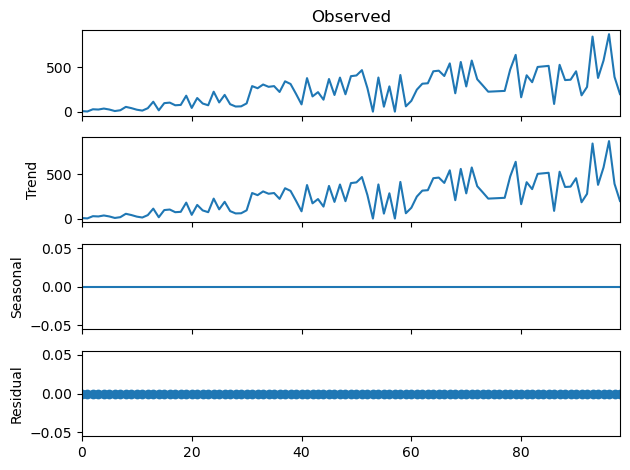

In [3]:
result = seasonal_decompose(series,model='additive',period=1)
result.plot()
pyplot.show()

In [4]:
df = pd.read_csv("/mnt/shubham SSD2/Time_series/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month'>

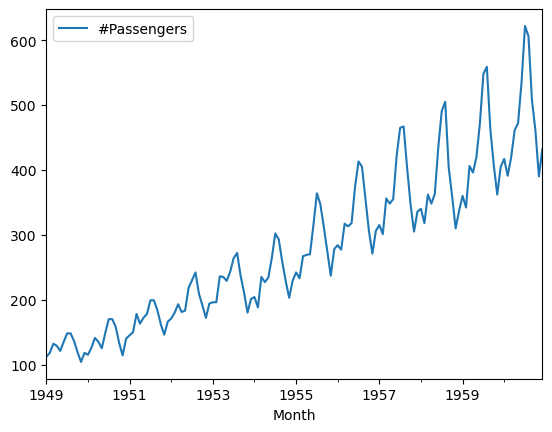

In [5]:
df.set_index('Month',inplace=True)
df.index = pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()

In [6]:
result_air = seasonal_decompose(df['#Passengers'],model="additive",period=12)

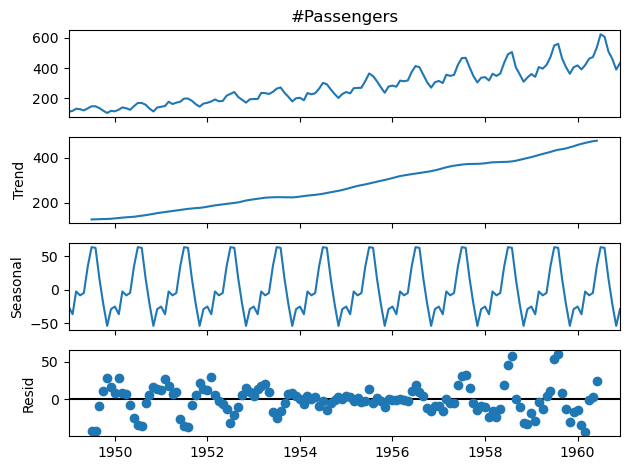

In [7]:
result_air.plot()
pyplot.show()

## time series 

The key difference between **non-time series problems** and **time series problems** lies in the role of time and how the data is structured and analyzed. Here's a breakdown:

### 1. **Non-Time Series Problems**
- **Definition**: These problems involve data where time is not a critical factor. The observations are independent of each other and do not follow a temporal order.
- **Data Structure**: Data is typically in a tabular format, where rows represent independent observations, and columns represent features.
- **Goal**: The focus is on predicting an outcome (dependent variable) based on input features (independent variables) without considering temporal dependencies.
- **Examples**:
  - Predicting house prices based on features like size, location, and number of bedrooms.
  - Classifying images into categories (e.g., cats vs. dogs).
  - Predicting customer churn based on demographic and behavioral data.
- **Techniques**:
  - Regression (e.g., linear regression, logistic regression).
  - Classification (e.g., decision trees, support vector machines, neural networks).

---

### 2. **Time Series Problems**
- **Definition**: These problems involve data where time plays a critical role. Observations are sequential and often dependent on previous time steps.
- **Data Structure**: Data is indexed by time (e.g., daily, monthly, yearly), and the order of observations is crucial.
- **Goal**: The focus is on predicting future values or understanding patterns over time, such as trends, seasonality, and cyclic behavior.
- **Examples**:
  - Forecasting stock prices or sales for the next month.
  - Predicting weather conditions based on historical data.
  - Analyzing website traffic trends over time.
- **Techniques**:
  - Time series models (e.g., ARIMA, SARIMA, Exponential Smoothing).
  - Machine learning models adapted for sequential data (e.g., LSTMs, GRUs).
  - Seasonal decomposition to analyze trends, seasonality, and residuals.

---

### Key Differences
| Aspect                  | Non-Time Series Problems                     | Time Series Problems                          |
|-------------------------|-----------------------------------------------|-----------------------------------------------|
| **Role of Time**        | Time is not a factor.                        | Time is a critical factor.                    |
| **Data Dependency**     | Observations are independent.                | Observations are dependent on previous time steps. |
| **Order of Data**       | Order of data does not matter.               | Order of data is crucial.                     |
| **Goal**                | Predict outcomes based on features.          | Predict future values or analyze temporal patterns. |
| **Techniques**          | Regression, classification, clustering, etc. | ARIMA, LSTMs, Exponential Smoothing, etc.     |

In summary, **non-time series problems** focus on relationships between variables without considering time, while **time series problems** emphasize temporal dependencies and patterns in sequential data.

### **Interpolation vs Extrapolation**

1. **Interpolation**:
   - **Definition**: Interpolation is the process of estimating unknown values within the range of known data points.
   - **Use Case**: It is used when you have missing data points in a dataset and want to estimate their values based on the surrounding data.
   - **Example**: If you know the temperature at 10 AM and 12 PM, you can interpolate to estimate the temperature at 11 AM.

   **Python Example**:
   ```python
   import pandas as pd
   import numpy as np

   # Example time series with missing values
   data = pd.Series([1, 2, np.nan, 4, 5], index=pd.date_range('2023-01-01', periods=5))

   # Interpolation
   interpolated_data = data.interpolate(method='linear')
   print(interpolated_data)
   ```

2. **Extrapolation**:
   - **Definition**: Extrapolation is the process of estimating values beyond the range of known data points.
   - **Use Case**: It is used when you want to predict future values based on existing trends or patterns.
   - **Example**: If you know the sales for the past 12 months, you can extrapolate to predict sales for the next month.

   **Note**: Extrapolation is riskier than interpolation because it assumes that the existing trends will continue, which may not always be true.

---

### **Can Time Series Problems Be Solved with Regression?**

Yes, time series problems can be solved using regression, but it requires careful handling of the temporal nature of the data. Here are some approaches:

1. **Feature Engineering**:
   - Convert the time series data into a supervised learning problem by creating lag features (e.g., using past values as predictors).
   - Example: To predict sales for day \( t \), use sales from days \( t-1, t-2, \dots \) as input features.

   **Python Example**:
   ```python
   import pandas as pd

   # Example time series data
   data = pd.Series([10, 20, 30, 40, 50], index=pd.date_range('2023-01-01', periods=5))

   # Create lag features
   df = pd.DataFrame({'y': data})
   df['lag_1'] = df['y'].shift(1)
   df['lag_2'] = df['y'].shift(2)

   print(df)
   ```

2. **Regression Models**:
   - Use regression models (e.g., linear regression, decision trees) with the lagged features to predict future values.
   - Example: Predict stock prices using past prices as input features.

3. **Limitations**:
   - Regression does not inherently account for time-based patterns like trends or seasonality.
   - You may need to explicitly model these patterns (e.g., by adding time-based features like month, day, or season).

4. **When to Use Regression**:
   - When the time series data is short or irregular.
   - When you want to incorporate external features (e.g., weather, holidays) that influence the time series.

---

### **Conclusion**
- **Interpolation** is for estimating missing values within the data range, while **extrapolation** is for predicting values beyond the data range.
- Time series problems can be solved with regression by transforming the data into a supervised learning format, but specialized time series models (e.g., ARIMA, LSTMs) are often better suited for capturing temporal dependencies.

**Seasonal differencing** in time series is a technique used to remove **seasonal patterns** from the data. It involves subtracting the value of a data point from the value of the data point at the same position in the previous season. This helps in making the time series stationary by eliminating seasonality.

### **Why Use Seasonal Differencing?**
- Time series data often exhibits repeating patterns over fixed intervals (e.g., monthly sales, daily temperatures).
- Seasonal differencing removes these repeating patterns, making the data easier to model and analyze.
- It is particularly useful when working with models like ARIMA, which require the data to be stationary.

---

### **How Seasonal Differencing Works**
If the time series has a seasonal period \( s \) (e.g., \( s = 12 \) for monthly data with yearly seasonality), the seasonal difference is calculated as:

\[
y_t' = y_t - y_{t-s}
\]

Where:
- \( y_t \): The value at time \( t \).
- \( y_{t-s} \): The value at the same position in the previous season.
- \( y_t' \): The seasonally differenced value.

---

### **Example**
Consider monthly sales data with yearly seasonality (\( s = 12 \)):

| Month | Sales (\( y_t \)) | Seasonal Difference (\( y_t - y_{t-12} \)) |
|-------|-------------------|--------------------------------------------|
| Jan   | 100               | -                                          |
| Feb   | 120               | -                                          |
| ...   | ...               | ...                                        |
| Jan (next year) | 150     | \( 150 - 100 = 50 \)                       |

---

### **Python Example**
Here's how to perform seasonal differencing in Python:



In [8]:
import pandas as pd

# Example time series data
data = pd.Series([100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
                  150, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270],
                 index=pd.date_range(start='2020-01', periods=24, freq='M'))

# Perform seasonal differencing (s=12 for yearly seasonality)
seasonal_diff = data.diff(12)

print(seasonal_diff)

2020-01-31     NaN
2020-02-29     NaN
2020-03-31     NaN
2020-04-30     NaN
2020-05-31     NaN
2020-06-30     NaN
2020-07-31     NaN
2020-08-31     NaN
2020-09-30     NaN
2020-10-31     NaN
2020-11-30     NaN
2020-12-31     NaN
2021-01-31    50.0
2021-02-28    50.0
2021-03-31    50.0
2021-04-30    50.0
2021-05-31    50.0
2021-06-30    50.0
2021-07-31    50.0
2021-08-31    50.0
2021-09-30    50.0
2021-10-31    50.0
2021-11-30    50.0
2021-12-31    50.0
Freq: ME, dtype: float64


/tmp/ipykernel_162146/3581792313.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='2020-01', periods=24, freq='M'))




---

### **When to Use Seasonal Differencing**
- When the time series exhibits strong seasonality.
- Before applying models like ARIMA or SARIMA to make the data stationary.

---

### **Key Points**
- Seasonal differencing removes repeating seasonal patterns.
- It is a preprocessing step to make the time series stationary.
- After seasonal differencing, you can further analyze the data or apply forecasting models.

In [22]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [23]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')


In [27]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0)

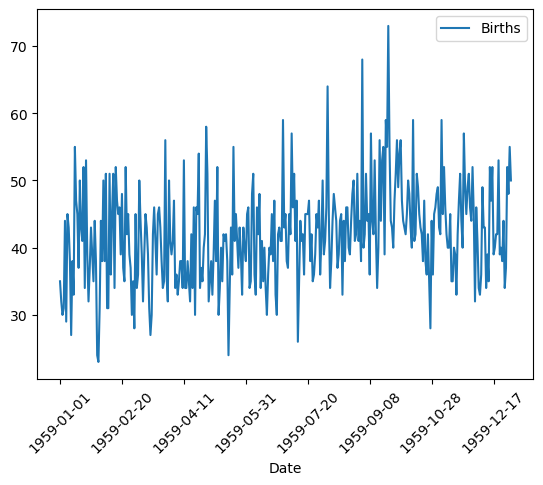

In [28]:
series.plot(legend=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [29]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [30]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


## recognised as ARMA


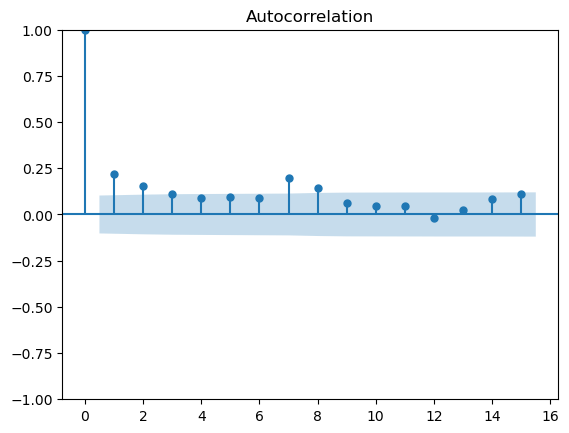

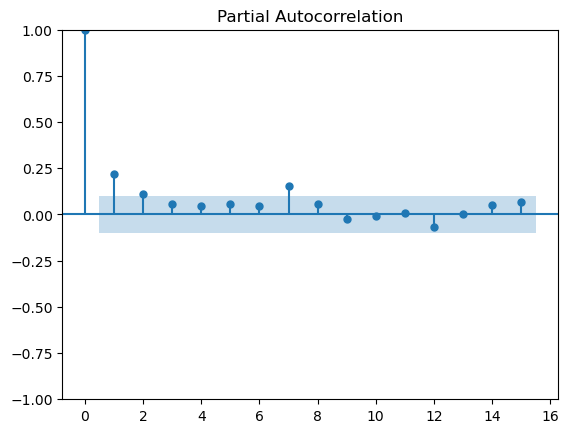

In [31]:
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

In [32]:
ar_orders = [1, 2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit

/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

In [33]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 2479.080627834601
AIC for AR(2): 2476.363657107182
AIC for AR(7): 2472.778262629018


In [34]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.7803198953484
BIC for AR(2): 2491.963246521512
BIC for AR(7): 2507.8773388112604


In [35]:
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/shubham/anaconda3/envs/DL/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

In [36]:

for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 2468.9057980333196, BIC: 2484.5053874476494
ARMA(1,2) - AIC: 2466.724037900659, BIC: 2486.2235246685714
ARMA(2,1) - AIC: 2466.2832664543444, BIC: 2485.782753222257
ARMA(2,2) - AIC: 2467.6978578865182, BIC: 2491.0972420080134


In [37]:

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [42]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

/tmp/ipykernel_162146/4154342099.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
